# Federated Learning (Data Scientist)


*Published by* <a href = "https://www.leow.ca"> by Leo Wei </a>

Before reading the rest of this blog, make sure you have the <a href = "https://de-fellows.github.io/RexCoding/2022/06/09/MNIST_Data_Owner.html"> Federated Learning (Data Owner)</a> open side by side.

## Table of Contents:
* [What is federated learning?](#intro)
    * [Tools that made federated learning possible](#tools)
* [Installation](#installation)
* [Pysyft Duet (Data scientist)](#duet)
    * [Duet Basics](#basics)
    * [MNIST with Duet](#mnist)
        * [Part 1: Connect to Remote Duet Server](#part1)
        * [Part 2: Setting up Model and Data](#part2)
        * [Part 3: Training](#part3)
        * [Part 4: Inference](#part4)
* [Where to next](#next)

## What is federated learning? <a class ="anchor" id ="intro"/>
In the world of evergrowing data in every industry, data is becoming more scarce due to security and privacy reasons. This makes our jobs as data scientists harder as companies and institutions are holding onto their data for security and competitive reasons. Nowadays, a lot of important data are sensitive personal information, things like health, and happiness, etc. Our ability to solve problems is limited because we can't access the existing data. 

<br/>
Federated learning is a machine learning setting where multiple clients(data owners) can come together and solve a machine learning problem, under the coordination of a central server(data scientist). Each data owner's data is stored  locally, and will not be access without direct permission. Instead of traditionally training on one machine locally, the network is sent to all clients and trained on multiple clients simultaneously. After training, the machine learning model would aggregate the model updates from the trained model from the clients.

There are many situations in which federated learning can be used to solve problems. One use case of this is in the  healthcare industry: <br/>
Breast cancer is a something that is faced by 1 in 8 woman. It is actually very treatable if it is detected early enough in a mammogram. However, this is where the problem lies. In detection, there is a 1 in 4 chance that the radiologist will give false positive or false negative, and with AI, the detection accuracy is even worse with the accuracy being 1 in 3 false positive or false negative. This is most likely due to our models not having enough training data, the amount of training data we have is less than <0.1% of the world's mammography images. These data we need are stored across thousands of organizations, and acquiring data from each organization is extremely difficult as some organizations will protect patients' privacy not mentioning the bureaucracy involved in signing contracts and risk management with thousands of different companies and organizations. <br/>

Federated learning could tackle this problem by having a massive federated data network, each data center(hospital, research center, etc) would act as a client. We, the data scientist is able to send our machine learning model to each client, and have the client train the model locally, and finally update the global model by exchanging the weighted average of the weights. (FedAvg Algorithm)

![source: Nividia](https://blogs.nvidia.com/wp-content/uploads/2019/10/federated_learning_animation_still_white.png)

### Advantages of federated learning
- Data never leaves the owner's device, privacy of sensitive data is stored. 
- Federated learning allows devices like cell phones to train collectively, thus saving computation and memory on the server, data scientist's side.
- Data owners are more comfortable with sharing their data, and leading to better machine learning models.

### Limitations of federated learning
- Communication, latency is often the bottleneck for federated learning. 
- Variability in client hardware, it is often the case that after each round of training, the server will have to wait for the slower devices to report back with their trained weights. These stragglers often slow down the network, often times, the network just drop the stragglers, but is that a good approach? Does that mean the model will cater more towards people with faster phones?

## Tools that made federated learning possible <a class = "anchor" id= "tools"/>

### 1. Remote execution
Remote execution is a core tool used in federated learning. Instead of downloading the data from the clients and then performing machine learning on it, remote execution allows you to use the client's data without their data leaving their devices.

### 2. Search and example data 
If we are executing functions remotely, how can we do data science without seeing the data? <br/>
With tools such as sample data, we can feature engineer the data without actually seeing the full data. We can request from the data owners to allow us to see a small sub sample of the data in order for us to get a better understanding of the data. 

### 3. Differential privacy 
How do we query again a database without revealing too much information about its privacy data? <br/>
Our goal is to achieve perfect privacy, meaning that the output of our query is the same between this database and any identical database with one row removed or replaced. However, achieving this is incredibly difficult and the way in which we attempt to achieve this is by adding a certain level of noise to the data.

### 4. Secure multi-party computation
The idea of secure multi-party computation is that multiple people can combine their private inputs to compute a function, without revealing their inputs to each other.

In the following example, we will look at one of the most popular library for federated learning Pysyft. Developed by openmined, pysyft was developed with the goal of secure and private machine learning. The Pysyft library is meant for you to write code that is capable of computing on data not owned on your local machine. In the following demo, we will be exploring the tool of remote execution. 

## Installation <a class="anchor" id="installation" />

Before we dive into federated learning, let's install the necessary packages.

#### 1. Install Conda environment
`conda create --name duet python=3.8`
Don't forget to activate your environment
`conda activate duet`

#### 2. Install necessary packages
Inside your folder, create a txt file named 'requirements.txt' <br/>
Then copy and past the following inside the txt file
`
numpy
aiortc
cryptography
dataclasses
dpcontracts
flask
forbiddenfruit>=0.1.3
loguru
matplotlib
nest_asyncio
packaging
pandas
protobuf
pydagogy
PyNaCl
requests
scikit-learn
seaborn
sqlitedict
statsmodels
typeguard
typing-extensions # backport to older python 3
websockets
jupyter
Jinja2<3.0
`
<br/>
Afterwards, we can install the requirements by running the following command

`pip install -r requirements.txt`

#### 3. Install Pysyft
`pip install syft==0.5.0`

#### If you have errors
- `ImportError: cannot import name 'soft_unicode' from 'markupsafe'`
Resolve this by
`python -m pip install markupsafe==2.0.1`
- If you have the warning of CrytographyDeprecationWarning, you can ignore it for now.

# Pysyft Duet (Data Scientist) <a class = "anchor" id = "duet" />

A peer-to-peer tool developed on top of the PySyft. It allows the data owner to expose their data to the data scientist, and the data scientist can manipulate the data through a zero-knowledge access mechanism. As data owners, you have the right to decide whether to allow the manipulation of data, you can deny or approve requests from the data scientists. As data scientists, you can develop new insights and train your model using the data owned by the data owners. 

Duet was used to demonstrate federated learning with PySyft without being deployed in the PyGrid ecosystem.

1. To start, both the data owner and the data scientist will have to talk to one of the open grid network nodes hosted on AWS by OpenMined. The node will introduce the service to each other behind a firewall and help them connect peer to peer.

2. The data owner need to first connect initiate and launch the duet server.

3. With the server ID, the data scientist can join the duet session. This will give the data scientist a duet client id.

4. The data owner will then need to enter the client id to complete the setup process.

5. If all goes well, the data scientist and the data owner should be connected now.

## Duet Basics <a class = "anchor" id = "basics"/>

As the Data Scientist, you want to perform data science on data that is sitting in the Data Owner's Duet server in their Notebook.

In order to do this, we must run the code that the Data Owner sends us, which importantly includes their Duet Session ID. The code will look like this, importantly with their real Server ID.

import syft as sy
duet = sy.duet('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
This will create a direct connection from my notebook to the remote Duet server. Once the connection is established all traffic is sent directly between the two nodes.

Copy and paste the code or Server ID that the Data Owner gives you and run it in the cell below. It will return your Client ID which you must send to the Data Owner to enter into Duet so it can pair your notebooks.

Make sure that the network_url you use is chosen from
https://raw.githubusercontent.com/OpenMined/OpenGridNodes/master/network_address

### Step 2. Establish Connection with Data Owner

In [1]:
import syft as sy
duet = sy.join_duet("00eec93acc58f144d78a365705d42223", network_url="http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000/")

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000/
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following Duet Client ID to your duet partner!
♫♫♫ > Duet Client ID: 3406364123dfde0c6e7394b2167a9ef9

♫♫♫ > ...waiting for partner to connect...


/opt/anaconda3/envs/duet/lib/python3.9/site-packages/aiortc/rtcdtlstransport.py:211: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  _openssl_assert(lib.SSL_CTX_use_certificate(ctx, self._cert._x509) == 1)  # type: ignore
/opt/anaconda3/envs/duet/lib/python3.9/site-packages/aiortc/rtcdtlstransport.py:186: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  value=certificate_digest(self._cert._x509),  # type: ignore



♫♫♫ > CONNECTED!


The `duet` variable is your reference to remote operations including supported libraries like torch.

<Strong>Step 3. Go to Data Owner Notebook <Strong/>

### Step 4. Let's Search and Create Pointer to Data

We can search for available data with their meta data(tags, decription and object type) with the following:

In [2]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 2550b41ead684a24ac87a5dced4c5c6d>,[grades],This is a list of the grades of 6 people,<class 'torch.Tensor'>


We can create a pointer to the data in the duet store. Note that this is the reference to the data, not the actual data.


In [3]:
data_ptr = duet.store[0]

Now, let's do some computation remotely

In [4]:
average_grade = data_ptr.float().mean()

After we have done the computation, let's try and get the result from the data owner's server.

In [5]:
try:
    average_grade.get()
except Exception:
    print(Exception)

[2022-06-19T16:37:24.260967-0600][CRITICAL][logger]][15013] You do not have permission to .get() Object with ID: <UID: 0e6d0efcb06441db9d958e2006f5cbc8>Please submit a request.


<class 'Exception'>


Looks like we need to request for permission from the data owner. We can do this by using the .request with your reasoning inside.

In [6]:
average_grade.request(reason = "please, I need it")

<Strong>Step 5. Go to Data Owner Notebook <Strong/>

### Step 6. Let's try to get data from Data Owner

In [7]:
try:
    average_grade.get()
except Exception:
    print(Exception)

[2022-06-19T16:37:35.877293-0600][CRITICAL][logger]][15013] You do not have permission to .get() Object with ID: <UID: 0e6d0efcb06441db9d958e2006f5cbc8>Please submit a request.


<class 'Exception'>


Looks like our request didn't go through, let's create a new request with a better reasoning.

In [8]:
average_grade.request(
    reason = "I am a data scientist and I need to know the average of the students' grades for my analysis"
)

<Strong>Step 7. Go to Data Owner Notebook <Strong/>

### Step 8. Get Result Data

We can check if there are still outstanding requests by running the following block

In [9]:
duet.requests.pandas

""


Looks like our request went through, now let's get the data

In [10]:
avg = average_grade.get()
print(avg)

tensor(81.1667)


<Strong>Step 9. Go to Data Owner Notebook <Strong/>

### Step 10. Machine Learning with Duet MNIST

# MNIST with Duet <a class = "anchor" id = "mnist" />

## Part 1: Connect to Remote Duet Server (Done above) <a class = "anchor" id = "part1" />

## Part 2: Setting up Model and Data <a class = "anchor" id = "part2"/>

In [11]:
import torch
import torchvision

Note that here, instead of traditionally inheriting from the nn.Module, we inherit from sy.Module, and we also need to pass in a variable called torch_ref when we constuct this network, the torch_ref will be used internally for any calls that would normally be to torch.

In [12]:
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        self.conv1 = self.torch_ref.nn.Conv2d(1, 32, 3, 1)
        self.conv2 = self.torch_ref.nn.Conv2d(32, 64, 3, 1) 
        self.dropout1 = self.torch_ref.nn.Dropout2d(0.25)
        self.dropout2 = self.torch_ref.nn.Dropout2d(0.5)
        self.fc1 = self.torch_ref.nn.Linear(9216, 128)
        self.fc2 = self.torch_ref.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.torch_ref.nn.functional.relu(x)
        x = self.conv2(x)
        x = self.torch_ref.nn.functional.relu(x)
        x = self.torch_ref.nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = self.torch_ref.flatten(x, 1)
        x = self.fc1(x)
        x = self.torch_ref.nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = self.torch_ref.nn.functional.log_softmax(x, dim=1)
        return output

In [13]:
# We can create the model and pass in our local copy of torch
local_model = SyNet(torch)

In [14]:
# Lets define a few settings which are from the original MNIST example command-line args
args = {
    "batch_size": 64,
    "test_batch_size": 1000,
    "epochs": 3,
    "lr": 0.01,
    "gamma": 0.7,
    "no_cuda": False,
    "dry_run": False,
    "seed": 42, 
    "log_interval": 10,
    "save_model": True,
}

Now we can send our local model to our partner's Duet server

In [15]:
model = local_model.send(duet)

We can create an alias for our partner's torch called `remote_torch`, we do this so we can refer to the local torch as `torch` and any operations we want to do remotely as `remote_torch`. Remeber that the return values from `remote_torch` are Pointers, not the actual objects themselves. Keep in mind that you cannot mix the pointers with local torch objects.

In [16]:
remote_torch = duet.torch

In [17]:
# We can ask to see if the data owner has CUDA
has_cuda = False
has_cuda_ptr = remote_torch.cuda.is_available()
has_cuda = bool(has_cuda_ptr.get(
    request_block=True,
    reason="To run test and inference locally",
    timeout_secs=20,  # change to something slower
))
print(has_cuda)

use_cuda = not args["no_cuda"] and has_cuda
# now we can set the seed
remote_torch.manual_seed(args["seed"])

device = remote_torch.device("cuda" if use_cuda else "cpu")
print(f"Data Owner device is {device.type.get()}")

False
Data Owner device is cpu


In [18]:
# if we have CUDA lets send our model to the GPU
if has_cuda:
    model.cuda(device)
else:
    model.cpu()

Get parameters, setup an optimizer and scheduler just like you would do in Pytorch

In [19]:
params = model.parameters()

In [20]:
optimizer = remote_torch.optim.Adadelta(params, lr=args["lr"])

In [21]:
scheduler = remote_torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=args["gamma"])

Next we need a training loop so we can improve our remote model. Since we want to train on remote data we should first check if the model is remote since we will be using remote_torch in this function. To check if a model is local or remote simply use the `.is_local` attribute.

In [22]:
def train(model, torch_ref, train_loader, optimizer, epoch, args, train_data_length):
    # + 0.5 lets us math.ceil without the import
    train_batches = round((train_data_length / args["batch_size"]) + 0.5)
    print(f"> Running train in {train_batches} batches")
    if model.is_local:
        print("Training requires remote model")
        return

    model.train()

    for batch_idx, data in enumerate(train_loader):
        data_ptr, target_ptr = data[0], data[1]
        optimizer.zero_grad()
        output = model(data_ptr)
        loss = torch_ref.nn.functional.nll_loss(output, target_ptr)
        loss.backward()
        optimizer.step()
        loss_item = loss.item()
        train_loss = duet.python.Float(0)  # create a remote Float we can use for summation
        train_loss += loss_item
        if batch_idx % args["log_interval"] == 0:
            local_loss = None
            local_loss = loss_item.get(
                reason="To evaluate training progress",
                request_block=True,
                timeout_secs=5
            )
            if local_loss is not None:
                print("Train Epoch: {} {} Loss: {:.4}".format(epoch, batch_idx, local_loss))
            else:
                print("Train Epoch: {} {} ?".format(epoch, batch_idx))
        if batch_idx >= train_batches - 1:
            print("batch_idx >= train_batches, breaking")
            break
        if args["dry_run"]:
            break

In [23]:
def test_local(model, torch_ref, test_loader, test_data_length):
    # download remote model
    if not model.is_local:
        local_model = model.get(
            request_block=True,
            reason="test evaluation",
            timeout_secs=5
        )
    else:
        local_model = model
    # + 0.5 lets us math.ceil without the import
    test_batches = round((test_data_length / args["test_batch_size"]) + 0.5)
    print(f"> Running test_local in {test_batches} batches")
    local_model.eval()
    test_loss = 0.0
    correct = 0.0

    with torch_ref.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            output = local_model(data)
            iter_loss = torch_ref.nn.functional.nll_loss(output, target, reduction="sum").item()
            test_loss = test_loss + iter_loss
            pred = output.argmax(dim=1)
            total = pred.eq(target).sum().item()
            correct += total
            if args["dry_run"]:
                break
                
            if batch_idx >= test_batches - 1:
                print("batch_idx >= test_batches, breaking")
                break

    accuracy = correct / test_data_length
    print(f"Test Set Accuracy: {100 * accuracy}%")

In [24]:
# we need some transforms for the MNIST data set
local_transform_1 = torchvision.transforms.ToTensor()  # this converts PIL images to Tensors
local_transform_2 = torchvision.transforms.Normalize(0.1307, 0.3081)  # this normalizes the dataset

# compose our transforms
local_transforms = torchvision.transforms.Compose([local_transform_1, local_transform_2])
from syft.util import get_root_data_path
# we will configure the test set here locally since we want to know if our Data Owner's
# private training dataset will help us reach new SOTA results for our benchmark test set
test_kwargs = {
    "batch_size": args["test_batch_size"],
}

test_data = torchvision.datasets.MNIST(str(get_root_data_path()), train=False, download=True, transform=local_transforms)
test_loader = torch.utils.data.DataLoader(test_data,**test_kwargs)
test_data_length = len(test_loader.dataset)
print(test_data_length)


10000


In [25]:
# we need some transforms for the MNIST data set
remote_torchvision = duet.torchvision

transform_1 = remote_torchvision.transforms.ToTensor()  # this converts PIL images to Tensors
transform_2 = remote_torchvision.transforms.Normalize(0.1307, 0.3081)  # this normalizes the dataset

remote_list = duet.python.List()  # create a remote list to add the transforms to
remote_list.append(transform_1)
remote_list.append(transform_2)

# compose our transforms
transforms = remote_torchvision.transforms.Compose(remote_list)

# The DO has kindly let us initialise a DataLoader for their training set
train_kwargs = {
    "batch_size": args["batch_size"],
}
train_data_ptr = remote_torchvision.datasets.MNIST(str(get_root_data_path()), train=True, download=True, transform=transforms)
train_loader_ptr = remote_torch.utils.data.DataLoader(train_data_ptr,**train_kwargs)

In [26]:
# normally we would not necessarily know the length of a remote dataset so lets ask for it
# so we can pass that to our training loop and know when to stop
def get_train_length(train_data_ptr):
    train_data_length = len(train_data_ptr)
    return train_data_length

try:
    if train_data_length is None:
        train_data_length = get_train_length(train_data_ptr)
except NameError:
        train_data_length = get_train_length(train_data_ptr)

print(f"Training Dataset size is: {train_data_length}")

Training Dataset size is: 60000


## Part 3: Training


In [ ]:
import time

#args["dry_run"] = True  # comment to do a full train
print("Starting Training")
for epoch in range(1, args["epochs"] + 1):
    epoch_start = time.time()
    print(f"Epoch: {epoch}")
    # remote training on model with remote_torch
    train(model, remote_torch, train_loader_ptr, optimizer, epoch, args, train_data_length)
    # local testing on model with local torch
    test_local(model, torch, test_loader, test_data_length)
    scheduler.step()
    epoch_end = time.time()
    print(f"Epoch time: {int(epoch_end - epoch_start)} seconds")
    if args["dry_run"]:
        break
print("Finished Training")

In [28]:
if args["save_model"]:
    model.get(
        request_block=True,
        reason="test evaluation",
        timeout_secs=5
    ).save("./duet_mnist.pt")

## Part 4: Inference

Now we can use our model to do inference either remotely or locally.

In [29]:
import matplotlib.pyplot as plt
def draw_image_and_label(image, label):
    fig = plt.figure()
    plt.tight_layout()
    plt.imshow(image, cmap="gray", interpolation="none")
    plt.title("Ground Truth: {}".format(label))
    
def prep_for_inference(image):
    image_batch = image.unsqueeze(0).unsqueeze(0)
    image_batch = image_batch * 1.0
    return image_batch

In [30]:
def classify_local(image, model):
    if not model.is_local:
        print("model is remote try .get()")
        return -1, torch.Tensor([-1])
    image_tensor = torch.Tensor(prep_for_inference(image))
    output = model(image_tensor)
    preds = torch.exp(output)
    local_y = preds
    local_y = local_y.squeeze()
    pos = local_y == max(local_y)
    index = torch.nonzero(pos, as_tuple=False)
    class_num = index.squeeze()
    return class_num, local_y

In [31]:
def classify_remote(image, model):
    if model.is_local:
        print("model is local try .send()")
        return -1, remote_torch.Tensor([-1])
    image_tensor_ptr = remote_torch.Tensor(prep_for_inference(image))
    output = model(image_tensor_ptr)
    preds = remote_torch.exp(output)
    preds_result = preds.get(
        request_block=True,
        reason="To see a real world example of inference",
        timeout_secs=10
    )
    if preds_result is None:
        print("No permission to do inference, request again")
        return -1, torch.Tensor([-1])
    else:
        # now we have the local tensor we can use local torch
        local_y = torch.Tensor(preds_result)
        local_y = local_y.squeeze()
        pos = local_y == max(local_y)
        index = torch.nonzero(pos, as_tuple=False)
        class_num = index.squeeze()
        return class_num, local_y

Random Test Image: 1192
Displaying 1192 == 192 in Batch: 1/10


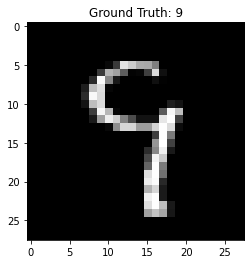

In [32]:
# lets grab something from the test set
import random
total_images = test_data_length # 10000
index = random.randint(0, total_images)
print("Random Test Image:", index)
count = 0
batch = index // test_kwargs["batch_size"]
batch_index = index % int(total_images / len(test_loader))
for tensor_ptr in test_loader:
    data, target = tensor_ptr[0], tensor_ptr[1]
    if batch == count:
        break
    count += 1

print(f"Displaying {index} == {batch_index} in Batch: {batch}/{len(test_loader)}")
if batch_index > len(data):
    batch_index = 0
image_1 = data[batch_index].reshape((28, 28))
label_1 = target[batch_index]
draw_image_and_label(image_1, label_1)

In [33]:
# classify remote
class_num, preds = classify_remote(image_1, model)
print(f"Prediction: {class_num} Ground Truth: {label_1}")
print(preds)

Prediction: 4 Ground Truth: 9
tensor([1.3907e-04, 5.6652e-04, 2.7458e-04, 4.1249e-03, 7.1542e-01, 3.2733e-03,
        2.5919e-03, 2.5418e-02, 2.2922e-02, 2.2527e-01],
       grad_fn=<SqueezeBackward0>)


In [34]:
# getting our model 
local_model = model.get(
    request_block=True,
    reason="To run test and inference locally",
    timeout_secs=5,
)

In [35]:
# classify local
class_num, preds = classify_local(image_1, local_model)
print(f"Prediction: {class_num} Ground Truth: {label_1}")
# here we can see the actual output
print(preds)

Prediction: 4 Ground Truth: 9
tensor([0.0020, 0.0041, 0.0078, 0.0385, 0.2883, 0.1381, 0.0244, 0.0568, 0.2300,
        0.2100], grad_fn=<SqueezeBackward0>)


In [36]:
# We can also download an image from the web and run inference on that
from PIL import Image, ImageEnhance
import PIL.ImageOps    

import os
def classify_url_image(image_url):
    filename = os.path.basename(image_url)
    os.system(f'curl -O {image_url}')
    im = Image.open(filename)
    im = PIL.ImageOps.invert(im)
#     im = im.resize((28,28), Image.ANTIALIAS)
    im = im.convert('LA')
    enhancer = ImageEnhance.Brightness(im)
    im = enhancer.enhance(3)


    print(im.size)
    fig = plt.figure()
    plt.tight_layout()
    plt.imshow(im, cmap="gray", interpolation="none")
    
    # classify local
    class_num, preds = classify_local(image_1, local_model)
    print(f"Prediction: {class_num}")
    print(preds)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

(89, 93)
Prediction: 4
tensor([0.0007, 0.0016, 0.0049, 0.0291, 0.4118, 0.0332, 0.0071, 0.0289, 0.0928,
        0.3899], grad_fn=<SqueezeBackward0>)


100  4655  100  4655    0     0   3819      0  0:00:01  0:00:01 --:--:--  3840


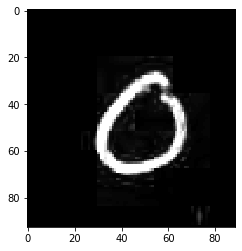

In [37]:
image_url = "https://raw.githubusercontent.com/kensanata/numbers/master/0018_CHXX/0/number-100.png"
classify_url_image(image_url)

## Where to go next? <a class = "anchor" id = "next" />


* https://courses.openmined.org/
    OpenMined(PySyft).
    This is where I learned most of the federated learning material, and they have a great series on private AI technologies. Highly recommend.
<hr/>
* https://flower.dev/
    Flower
    Another federated learning framework.
<hr/>
* https://www.tensorflow.org/federated
    Tensorflow Federated. Integrates very nicely with Tensorflow.
<br/> <br/>

## Acknowledgement
I would like to use this last section by thanking the support of my professor Yves Pauchard, and the DE Followship group. As well as the OpenMined Organization for innovating and building technology for the future, their work has inspired me to pursue more research and learning in the field of federated learning and I am extremely thankful. 
<br/> <br/>
![MVPUrl](https://media.giphy.com/media/GVMhZwYv8U5NK/giphy.gif "MVP")
